## 1.先import csv模組，然後打開查看iris資料集

In [1]:
import csv

In [2]:
with open('iris/iris.csv', newline='') as csvfile:

  rows = csv.reader(csvfile)

  for row in rows:
    print(row)

['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
['1', '5.1', '3.5', '1.4', '0.2', '0']
['2', '4.9', '3', '1.4', '0.2', '0']
['3', '4.7', '3.2', '1.3', '0.2', '0']
['4', '4.6', '3.1', '1.5', '0.2', '0']
['5', '5', '3.6', '1.4', '0.2', '0']
['6', '5.4', '3.9', '1.7', '0.4', '0']
['7', '4.6', '3.4', '1.4', '0.3', '0']
['8', '5', '3.4', '1.5', '0.2', '0']
['9', '4.4', '2.9', '1.4', '0.2', '0']
['10', '4.9', '3.1', '1.5', '0.1', '0']
['11', '5.4', '3.7', '1.5', '0.2', '0']
['12', '4.8', '3.4', '1.6', '0.2', '0']
['13', '4.8', '3', '1.4', '0.1', '0']
['14', '4.3', '3', '1.1', '0.1', '0']
['15', '5.8', '4', '1.2', '0.2', '0']
['16', '5.7', '4.4', '1.5', '0.4', '0']
['17', '5.4', '3.9', '1.3', '0.4', '0']
['18', '5.1', '3.5', '1.4', '0.3', '0']
['19', '5.7', '3.8', '1.7', '0.3', '0']
['20', '5.1', '3.8', '1.5', '0.3', '0']
['21', '5.4', '3.4', '1.7', '0.2', '0']
['22', '5.1', '3.7', '1.5', '0.4', '0']
['23', '4.6', '3.6', '1', '0.2', '0']
['24', '5.1', '3.3'

## 2.介紹：
### iris資料集裡面塞的是總共150筆的3種鳶尾花，每筆資料記載有以下資訊：
#### {SepalLength(花萼長度)、SepalWidth(花萼寬度)、PetalLength(花瓣長度)、PetalWidth(花瓣寬度)、Sepcies(鳶尾花品種)}

##  3.資料預處理
### 運用pandas處理csv檔案

In [3]:
import pandas as pd
import numpy as np
from io import StringIO

In [4]:
iris = pd.read_csv('iris/iris.csv')

In [5]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


### 用X來儲存鳶尾花的長度、寬度等資料，當作Feature特徵值。
### 用Y來儲存鳶尾花的品種名稱，當作Label資料類別。

In [6]:
X = iris.drop(columns=['Id','Species'])
Y = iris.drop(columns=['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'])

In [7]:
Y

,Species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


### 將X與Y做訓練與測試資料的切割。

In [8]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.3)

In [9]:
Y_train

,Species
119,2
137,2
35,0
4,0
3,0
...,...
76,1
15,0
94,1
37,0


### 將Y的訓練與測試資料做OneHotEncoding。

In [10]:
from keras.utils import np_utils
from sklearn.preprocessing import OneHotEncoder

Y_train_OneHot = np_utils.to_categorical(Y_train)
Y_test_OneHot = np_utils.to_categorical(Y_test)

Using TensorFlow backend.
D:\anaconda\ac\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\anaconda\ac\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\anaconda\ac\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\anaconda\ac\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) o

In [11]:
Y_test_OneHot

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

## 4.建立模型
### 匯入模組

In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [13]:
model = Sequential()

### 建立輸入層

In [14]:
model.add(Dense(units=105,input_dim=4,kernel_initializer='normal',activation='relu'))

#### 加入Dropout，防止overfitting。

In [15]:
model.add(Dropout(0.2))

### 建立輸出層

In [16]:
model.add(Dense(units=3,kernel_initializer='normal',activation='softmax'))

## 5.開始訓練

In [17]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
train_history = model.fit(x=X_train,y=Y_train_OneHot,validation_split=0.3,epochs=30,batch_size=20,verbose=2)


Train on 73 samples, validate on 32 samples
Epoch 1/30
 - 0s - loss: 1.0859 - accuracy: 0.3699 - val_loss: 1.0630 - val_accuracy: 0.6875
Epoch 2/30
 - 0s - loss: 1.0633 - accuracy: 0.4247 - val_loss: 1.0463 - val_accuracy: 0.7188
Epoch 3/30
 - 0s - loss: 1.0341 - accuracy: 0.5753 - val_loss: 1.0304 - val_accuracy: 0.7188
Epoch 4/30
 - 0s - loss: 1.0405 - accuracy: 0.4521 - val_loss: 1.0135 - val_accuracy: 0.7812
Epoch 5/30
 - 0s - loss: 1.0042 - accuracy: 0.6164 - val_loss: 0.9957 - val_accuracy: 0.7188
Epoch 6/30
 - 0s - loss: 0.9835 - accuracy: 0.6712 - val_loss: 0.9761 - val_accuracy: 0.7188
Epoch 7/30
 - 0s - loss: 0.9794 - accuracy: 0.6575 - val_loss: 0.9556 - val_accuracy: 0.7188
Epoch 8/30
 - 0s - loss: 0.9509 - accuracy: 0.6575 - val_loss: 0.9351 - val_accuracy: 0.9062
Epoch 9/30
 - 0s - loss: 0.9305 - accuracy: 0.7808 - val_loss: 0.9143 - val_accuracy: 0.9688
Epoch 10/30
 - 0s - loss: 0.8990 - accuracy: 0.7945 - val_loss: 0.8909 - val_accuracy: 0.9375
Epoch 11/30
 - 0s - loss

### 用圖檢視

In [19]:
import matplotlib.pyplot as plt
def show_train(train_history,accuracy,validation):
    plt.plot(train_history.history[accuracy])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(accuracy)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

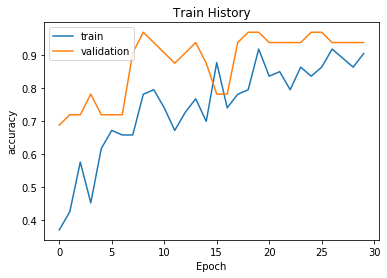

In [20]:
show_train(train_history,'accuracy','val_accuracy')

## 6.用測試資料作準確率比對

In [21]:
scores = model.evaluate(X_test,Y_test_OneHot)
print()
print('accuracy=',scores[1])

45/45 [==============================] - 0s 44us/step

accuracy= 0.9777777791023254


## 7.進行預測

In [22]:
prediction = model.predict_classes(X_test)

In [23]:
prediction

array([0, 0, 1, 2, 2, 2, 0, 0, 2, 2, 1, 0, 1, 1, 0, 0, 2, 0, 2, 1, 2, 1,
       0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 0, 2, 2, 2, 1,
       1], dtype=int64)

## 8.混淆矩陣(Confusion matrix)

#### 由於Y_test在前面是用pandas做出來的dataframe表格()，而predicition本身是一維陣列，所以必須先將Y_test轉為一維陣列。

In [24]:
Y_test.shape,prediction.shape

((45, 1), (45,))

In [25]:
Y_test_array = Y_test.values

In [26]:
Y_test_array

array([[0],
       [0],
       [1],
       [2],
       [2],
       [2],
       [0],
       [0],
       [2],
       [2],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [2],
       [0],
       [2],
       [1],
       [1],
       [1],
       [0],
       [2],
       [2],
       [0],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [2],
       [1],
       [2],
       [2],
       [0],
       [2],
       [2],
       [2],
       [1],
       [1]], dtype=int64)

#### 下面再將Y_test轉為橫向。

In [27]:
Y_test_arrayflat = Y_test_array.flatten()

In [28]:
pd.crosstab(Y_test_arrayflat,prediction,rownames=['label'],colnames=['predict'])

predict,0,1,2
label,,,
0,11,0,0
1,0,13,1
2,0,0,20


In [29]:
df = pd.DataFrame({'label':Y_test_arrayflat,'predict':prediction})
df

,label,predict
0,0,0
1,0,0
2,1,1
3,2,2
4,2,2
5,2,2
6,0,0
7,0,0
8,2,2
9,2,2


#### 列印出混淆矩陣中，不一樣的某些紀錄。

In [30]:
df[(df.label==1)&(df.predict==2)]

,label,predict
20,1,2
